# Data Cleaning

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats 

pd.options.display.max_rows = 500
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('initial_data/english_data.csv')

## Names and trash variables

In [4]:
col_substitute = {'sec': 'sex', 
                  'age_1': 'age', 
                  'weight_1': 'weight', 
                  'nationality_1': 'nationality',
                  'sleeping importance_1': 'sleeping importance', 
                  'alcol_1': 'beer', 
                  'alcol_2': 'wine', 
                  'alcol_3': 'liquors', 
                  'alcol_4': 'drinks', 
                  'sport importance_1': 'sport importance', 
                  'sleep importance_1': 'sleep importance', 
                  'sport frequency_1': 'sport frequency',
                  'sport effort_1': 'sport effort', 
                  'quality_1': 'food quality',
                  'food impact on self_1': 'food impact on health', 
                  'giorno_cibi_1': 'vegetables', 
                  'giorno_cibi_2': 'carbohidrates', 
                  'giorno_cibi_3': 'legumes', 
                  'giorno_cibi_4': 'cheese', 
                  'giorno_cibi_5': 'meat', 
                  'giorno_cibi_6': 'fish', 
                  'giorno_cibi_7': 'eggs',
                  'pausa_mattina_cibi_1': 'fruits morning',
                  'pausa_mattina_cibi_2': 'dried nuts morning',
                  'pausa_mattina_cibi_3': 'snacks morning',
                  'pausa_pome_cibi_1': 'fruits evening',
                  'pausa_pome_cibi_2': 'dried nuts evening',
                  'pausa_pome_cibi_3': 'snacks evening',
                  'fast food a month_1': 'fast food a month',
                  'frozen food a month_1': 'frozen food a month',
                  'asporto_freq_1': 'asporto',
                  'delivered food month_1': 'delivered food a month'}


col_trash = ['pausa_mattina_cibi_4', 'pausa_pome_cibi_4', 'height_1']

data = data.rename(columns=col_substitute)
data = data.drop(col_trash, axis=1)

## Removing useless variables

In [5]:
def remove_features(dataset):
    useless_features = ['StartDate',
                        'Duration (in seconds)',
                        'EndDate',
                        'IPAddress',
                        'Progress',
                        'RecordedDate',
                        'ResponseId',
                        'RecipientLastName',
                        'RecipientFirstName',
                        'RecipientEmail',
                        'ExternalReference',
                        'LocationLatitude',
                        'LocationLongitude',
                        'DistributionChannel',
                        'UserLanguage',
                        'smoke object_4_TEXT',]

    dataset = dataset.drop(useless_features, axis=1)
    return dataset
        

def remove_flat_variables(dataset):
    # Here we put the variables that are going to have only one value, like
    # Finished, consenso, Status, ecc..
    flat_vars = ['Finished', 'consenso', 'Status']
    dataset = dataset.drop(flat_vars, axis=1)
    return dataset



In [6]:
# We drop all the unfinished surveys, the ones who didn't consent, and previews
data = data.loc[data['Finished'] == 'True']
data = data.loc[data['consenso'] == 'Sì']
data = data.loc[data['Status'] == 'IP Address']
data = data.loc[data['sex'] != 'Altro:'] # They were 17

# And then we drop all the useless features
data = remove_features(data)
data = remove_flat_variables(data)

## Handling missing values

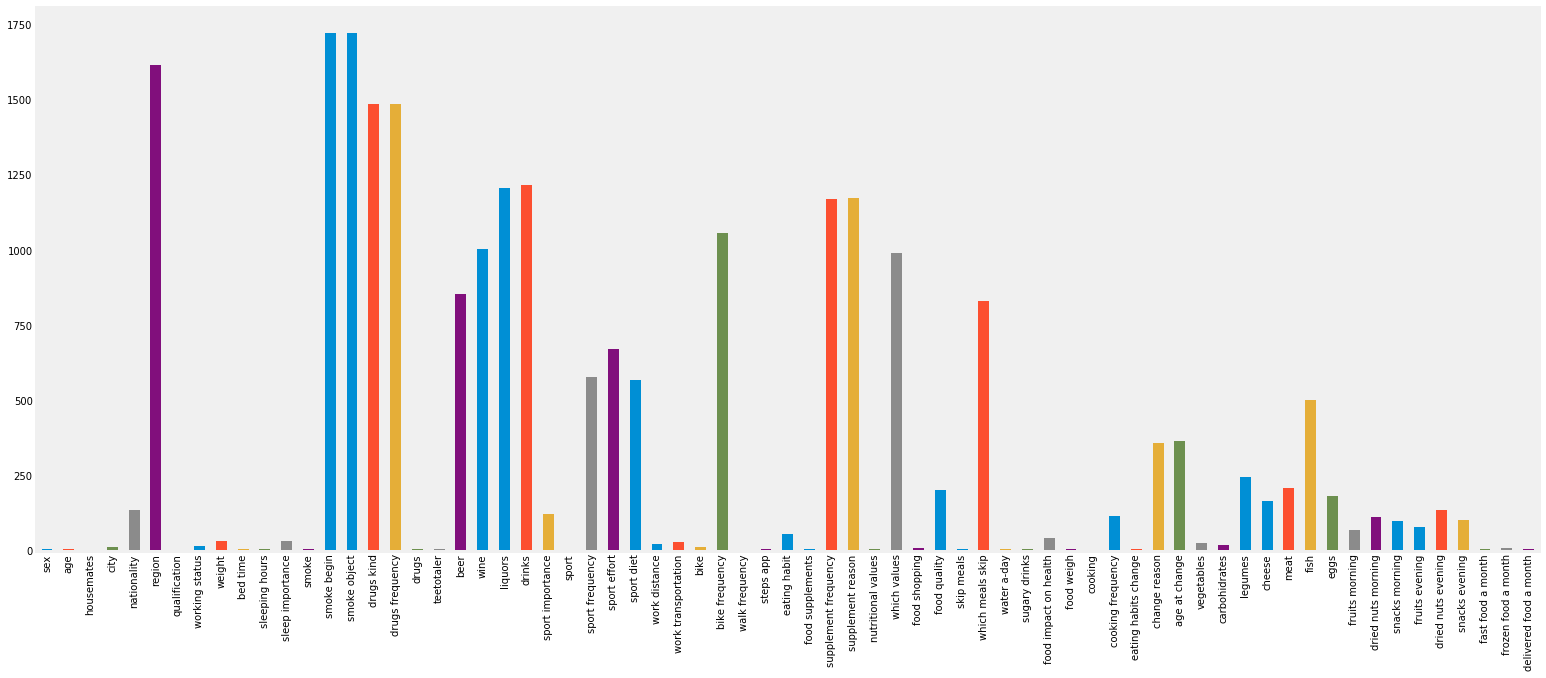

In [7]:
plt.figure(figsize=(24,10))
data.isna().sum().plot.bar()
plt.grid(b=None)

In [8]:
# Let's fix all the nan values

# In categorigal variables we can just put a 999

categoricals = ['region', 'smoke begin', 'smoke object', 'drugs kind',
                'drugs frequency', 'sport diet',
                'supplement frequency', 'supplement reason', 
                'which values', 'which meals skip', 'change reason',
                'age at change']

for i in categoricals:
    data[i] = data[i].fillna('None')

data['bike frequency'] = data['bike frequency'].fillna("I've go no bike")
data['cooking frequency'] = data['cooking frequency'].fillna("I can't cook") 

In [9]:
# Now we want to set variables that depended on the movement of a slider to 
# the value of the slider in the starting position (qualtrics is stupid)

sliders_0 = ['sport frequency', 'beer', 'wine', 'liquors', 'drinks',
             'vegetables', 'carbohidrates', 'legumes','cheese',
             'meat','fish','eggs',
             'fruits morning', 'dried nuts morning', 'snacks morning',
             'fruits evening', 'dried nuts evening', 'snacks evening']

sliders_50 = ['food quality', 'sport importance', 'sport effort', ]

for i in sliders_0:
    data[i] = data[i].fillna(0)

for i in sliders_50:
    data[i] = data[i].fillna(50)

In [10]:
# And now we'll just remove all the others nan, which are mostly from etnia_1

data = data.dropna(axis=0)

data.reset_index(drop=True)
data.shape

data.isna().sum().sum()

0

## Fixing specific variables

In [11]:
# Converting strings to numbers
for i in data.columns:
    try:
        data[i] = data[i].astype(float)
    except:
        pass
        

data['sleeping hours code'] = pd.Categorical(data['sleeping hours']).codes
data['bike code'] = pd.Categorical(data['bike frequency']).codes
data['walks code'] = pd.Categorical(data['walk frequency']).codes
data['sugary drinks code'] = pd.Categorical(data['sugary drinks']).codes

In [12]:
# Here we'll fix the etnia variable, that have some numerical values for some
# qualtrics bug
lost_val = [] 
for i in data.nationality.value_counts().index:
    if len(i) < 4:
        lost_val.append(i)


In [13]:
countries = pd.read_csv('country.csv')

In [14]:
lost_dict = {}
for i in lost_val:
    lost_dict[i] = countries.iloc[int(i)-2][0]

In [15]:
translated_dict = {'104': 'Ungheria',
                   '106': 'India',
                   '110': 'Irlanda',
                   '122': 'Kuwait',
                   '136': 'Malesia',
                   '158': 'Paesi Bassi',
                   '16': 'Austria',
                   '160': 'Nuova Zelanda',
                   '178': 'Filippine',
                   '198': 'Singapore',
                   '22': 'Bielorussia',
                   '220': 'Svezia',
                   '244': "Stati Uniti d'America",
                   '40': 'Canada',
                   '48': 'Cile',
                   '52': 'Colombia',
                   '78': 'Isole Faroe',
                   '80': 'Finlandia',
                   '88': 'Germania'}

                   
data.nationality = data.nationality.replace(translated_dict)

## Applying score calculators

### Health score


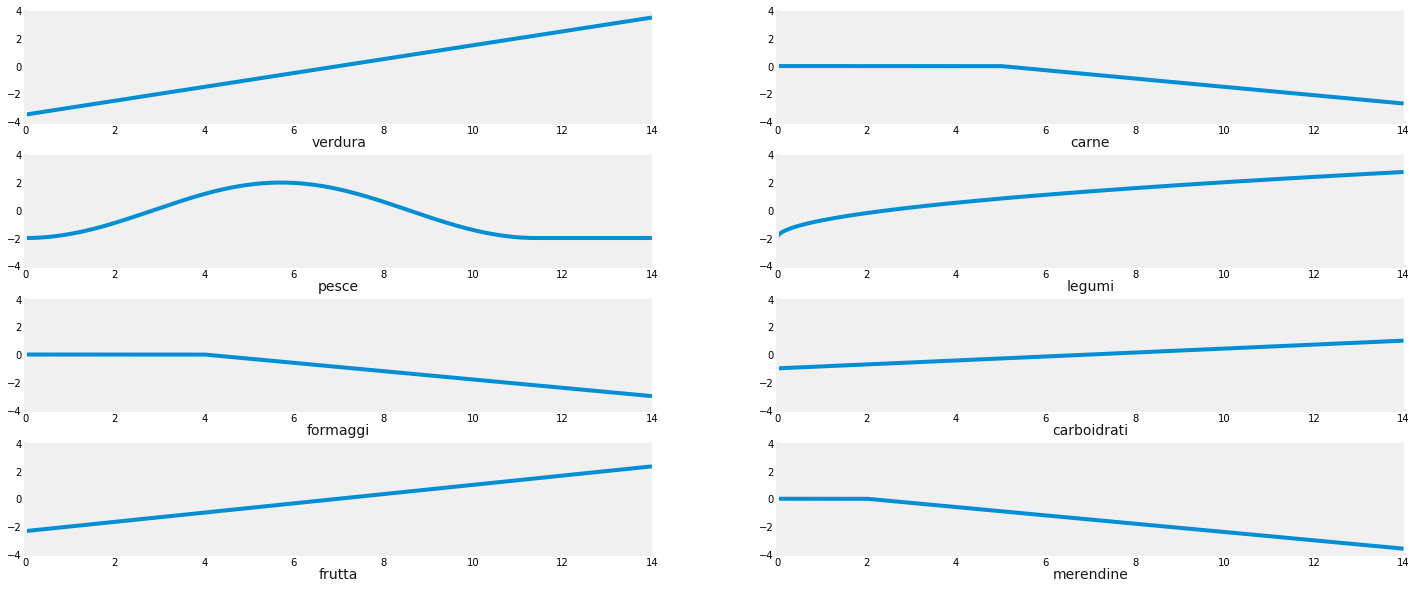

In [16]:
def p_verdura(n):
    p = (n - 7)*0.5
    return p


def p_carne(n):
    p = min((n-5)*(-0.3), 0)
    return p


def p_pesce(n):
    if n > 11.5:
        p = -2
    else:
        p = - 2*np.cos(0.55*n)
    return p


def p_legumi(n):
    p = 0.9*np.sqrt(n*2) - 2
    return p


def p_formaggi(n):
    p = min(0, (n-4)*(-0.3))
    return p


def p_uova(n):
    p = min(0, (n-7)*(-0.45))
    return p


def p_carboidrati(n):
    p = (n-7)*(1/7)
    return p


def p_frutta(n):
    p = (n-7)*(1/3)
    return p


def p_merendine(n):
    p = min(0, (n-2)*(-0.30))
    return p


def create_dataset():
    df = pd.DataFrame()
    for fun in fun_list:
        y = []
        for n in range(1401):
            y.append(fun(n*0.01))

        df[fun.__name__] = y

    df['x'] = [i*0.01 for i in range(1401)]

    return df


def plot(df, ax, func_name):
    ax.set_xlabel(func_name[2:], labelpad=0.1, alpha=0.9, fontsize=14)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlim(0, 14)
    ax.set_ylim(-4, 4)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xticks(range(0, 15, 2))
    ax.set_yticks(range(-4, 5, 2))

    ax.plot(df['x'],
            df[func_name])
    ax.grid(b=None)
 


def plot_all():
    df = create_dataset()

    fig, axs = plt.subplots(4, 2, figsize=(22,10))
    
    plt.subplots_adjust(hspace=0.300)
    coords = []
    for i in range(8):
        x = i % 2
        if x == 0:
            y = i//2
        coords.append((y, x))
    for n, i in enumerate(fun_list):
        


        plot(df, axs[coords[n]], i.__name__)


    plt.show()


def get_p(n_verdura, n_carne, n_pesce, n_legumi,
          n_formaggi, n_carboidrati, n_frutta, n_merendine):

    n_list = [n_verdura, n_carne, n_pesce, n_legumi,
              n_formaggi, n_carboidrati, n_frutta, n_merendine]
    total_p = 0
    for f, n in zip(fun_list, n_list):
        total_p += f(n)

    return total_p


fun_list = [p_verdura, p_carne, p_pesce, p_legumi,
            p_formaggi, p_carboidrati, p_frutta, p_merendine]

plot_all()


In [17]:
def health_score(df):
    score = (p_verdura(df['vegetables']) + 
             p_carboidrati(df['carbohidrates']) + 
             p_legumi(df['legumes']) + 
             p_formaggi(df['cheese']) + 
             p_carne(df['meat']) + 
             p_pesce(df['fish']) + 
             p_uova(df['eggs']) +
             p_frutta(df['fruits morning'] + df['fruits evening']) + 
             p_merendine(df['snacks morning'] +  df['snacks evening']))
    
    return score


# health_vars=['giorno_cibi_1', 
#              'giorno_cibi_2',
#              'giorno_cibi_3',
#              'giorno_cibi_4',
#              'giorno_cibi_5',
#              'giorno_cibi_6',
#              'giorno_cibi_7',
#              'pausa_mattina_cibi_1',
#              'pausa_mattina_cibi_3',
#              'pausa_pome_cibi_1',
#              'pausa_pome_cibi_3']

    
data['diet health score'] = data.apply(health_score, axis=1)
data['diet health score'] = (data['diet health score'] - data['diet health score'].mean())/data['diet health score'].std()

count    1.626000e+03
mean     2.184941e-17
std      1.000000e+00
min     -3.197941e+00
25%     -6.746367e-01
50%     -5.718571e-03
75%      7.205113e-01
max      2.540006e+00
Name: diet health score, dtype: float64
0.005132761783897877


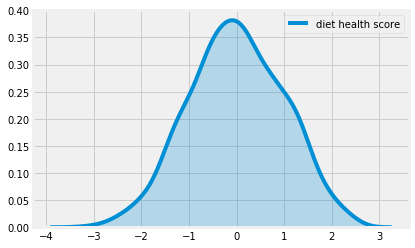

In [18]:
print(data['diet health score'].describe())
print(stats.shapiro(data['diet health score'])[1])

sns.kdeplot(data['diet health score'], shade=True)

### Lifestyle Score

In [19]:
def p_ora_letto(n):
    if n == 'Before 23':
        return 2
    elif n == "Between 23 and 1":
        return 0
    elif n == "After 1":
        return -2

def p_ore_di_sonno(n):
    if n == 0:
        return -2
    elif n == 4:
        return 2
    else:
        return 0

def p_fumo(n):
    if n == 'SYes':
        return -1
    elif n == 'No':
        return 0
    else:
        return 0

def p_alcol(astemio, n1, n2, n3, n4):
    if astemio == 'Yes':
        return 1
    else:
        return -(n1+n2+n3+n4)/7 + 1

def p_sport(sport, n):
    if sport == 'No':
        return -1
    else:
        return (n-1)/2

def p_mezzo(n):
    p = 0
    if 'walking' in n:
        p =+ 2
    elif 'bike' in n:
        p =+ 2
    return p 

def p_pass(n1, n2):
    return (n1 + n2-1)/2

def p_bibite(n):
    return -(n/2)


In [20]:
def p_lifestyle(df): 
    p = (p_ora_letto(df['bed time']) +
         p_ore_di_sonno(df['sleeping hours code']) +
         p_fumo(df['smoke']) +
         p_alcol(df['teetotaler'], df['wine'], df['beer'],
                 df['liquors'], df['drinks']) +
         p_sport(df['sport'], df['sport frequency']) +
         p_pass(df['bike code'], df['walks code']) +
         p_mezzo(df['work transportation']) +
         p_bibite(df['sugary drinks code']))

    return p


In [21]:
data['lifestyle score'] = data.apply(p_lifestyle, axis=1)
data['lifestyle score'] = (data['lifestyle score'] - data['lifestyle score'].mean())/data['lifestyle score'].std()

count    1.626000e+03
mean    -9.176751e-17
std      1.000000e+00
min     -3.674751e+00
25%     -6.605852e-01
50%      1.875635e-02
75%      7.046934e-01
max      2.788887e+00
Name: lifestyle score, dtype: float64
0.0008164219907484949


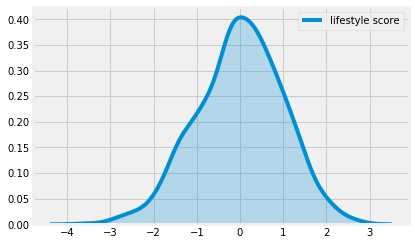

In [22]:
print(data['lifestyle score'].describe())
print(stats.shapiro(data['lifestyle score'])[1])


sns.kdeplot(data['lifestyle score'], shade=True)

In [23]:
data.to_csv('clean_english_data.csv', index=False)